In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.optimize import curve_fit
from scipy.stats import chisquare

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Gaussian distribution function ot for the residue
def gaussian(x,Amp,mu,sigma):
    return Amp*np.exp(-((x-mu)/sigma)**2)

In [3]:
def mean_std(residue):
    mean_residue = np.mean(residue)
    std_residue = np.std(residue)
    return mean_residue, std_residue

In [4]:
ts = pd.read_csv('/kaggle/input/plottings/time_series_data.txt',delimiter='\t')
ts.head()
# plt.scatter(ts['time'], ts['data']);
# straight line with some noise which is gaussian
# subtract the the fitted data which will give the residue;

,time,data
0,0.00000,1.790256
1,0.10101,2.140671
2,0.20202,2.367048
3,0.30303,2.367189
4,0.40404,2.357972


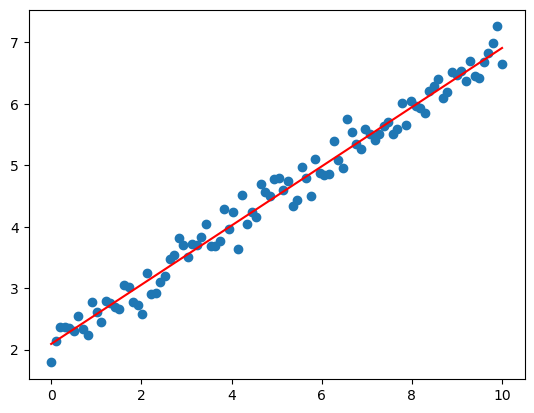

In [5]:
# Straight line with Sine
def straight_line(x,m,c):
    return m*x+c

# Fitting the curve
popt, covt = curve_fit(straight_line, ts['time'], ts['data'])

# Making predictions using optimal parameters
predicts_ts =  straight_line(ts['time'], popt[0], popt[1])

# Plotting the curve
plt.plot(ts['time'],predicts_ts, color='r')
plt.scatter(ts['time'], ts['data'])
plt.show()

Chi-square: 0.9887971698109516
Mean:0.0010791190445051608, Std:0.32260954453403645


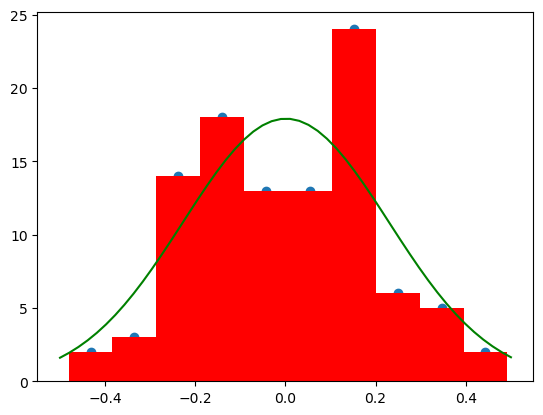

In [6]:
residue_ts = ts['data'] - predicts_ts
print("Chi-square:",chisquare(ts['data'],predicts_ts)[0])
count, interval_points = np.histogram(residue_ts, bins=10)
mid_points = (interval_points[:-1]+interval_points[1:])/2
plt.scatter(mid_points, count)
plt.hist(residue_ts, color='r') # for matching the histograms obtained by np.histogram and plt.hist
popt, covt = curve_fit(gaussian,mid_points, count)
print(f"Mean:{popt[1]}, Std:{popt[2]}")
cont_values = np.linspace(-0.5,0.5,50)
predict_count = gaussian(cont_values, popt[0],popt[1], popt[2])
plt.plot(cont_values, predict_count, color='g');

In [8]:
mean_std(residue_ts)

(-2.2841112112814699e-10, 0.20022595204155944)

In [9]:
st_sn = pd.read_csv('/kaggle/input/plottings09/straightline with sine wave.txt', delimiter='\t', header=None)
st_sn.head()
# plt.scatter(st_sn[0], st_sn[1]);
# straight line + sine with some noise which is gaussian
# subtract the the fitted data which will give the residue;

,0,1
0,0.00000,5.422586
1,0.10101,6.621048
2,0.20202,8.989250
3,0.30303,7.844254
4,0.40404,7.749334


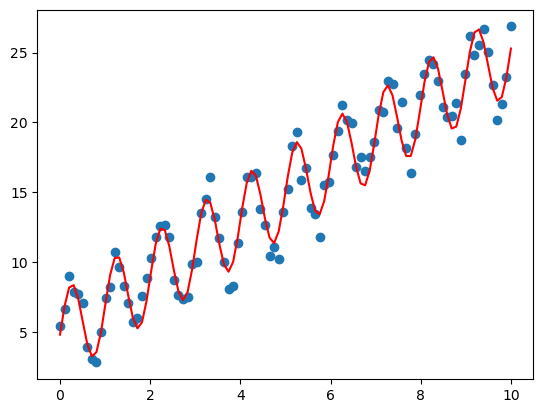

In [10]:
def st_with_sn1(x,m,p,n,c):
    return m*x+p*np.sin(2*np.pi*n*x)+c
popt, covt = curve_fit(st_with_sn1, st_sn[0], st_sn[1])
predicts_sn1 =  st_with_sn1(st_sn[0], popt[0], popt[1], popt[2], popt[3])
plt.plot(st_sn[0],predicts_sn1, color='r')
plt.scatter(st_sn[0], st_sn[1])
plt.show()

Chi-square: 6.923966154700791
Mean:-0.0006962998718136507, Std:1.4190839536994948


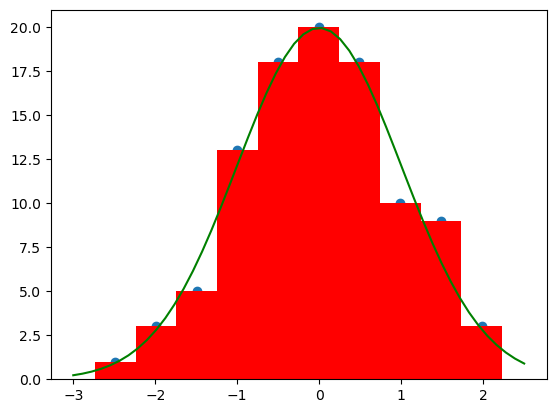

In [11]:
# Reisude
residue_st_sn = predicts_sn1 - st_sn[1]
print("Chi-square:",chisquare(predicts_sn1, st_sn[1])[0])
count, interval_points = np.histogram(residue_st_sn, bins=10)
mid_points = (interval_points[:-1]+interval_points[1:])/2
plt.scatter(mid_points, count)
plt.hist(residue_st_sn, color='r') # for matching the histograms obtained by np.histogram and plt.hist
popt, covt = curve_fit(gaussian,mid_points, count)
print(f"Mean:{popt[1]}, Std:{popt[2]}")
cont_values = np.linspace(-3,2.5,50)
predict_count = gaussian(cont_values, popt[0],popt[1], popt[2])
plt.plot(cont_values, predict_count, color='g');

In [12]:
mean_std(residue_st_sn)

(-2.281525368630355e-10, 0.9656811373327715)

In [13]:
st_sn_ss = pd.read_csv('/kaggle/input/plottings09/straightine sine wave with seasonality.txt', delimiter='\t', header=None)
st_sn_ss.head()
# plt.scatter(st_sn_ss[0], st_sn_ss[1]);
# straight line + sine with some noise which is gaussian
# subtract the the fitted data which will give the residue;

,0,1
0,0.00000,3.811391
1,0.10101,6.468603
2,0.20202,7.725722
3,0.30303,7.048001
4,0.40404,7.892855


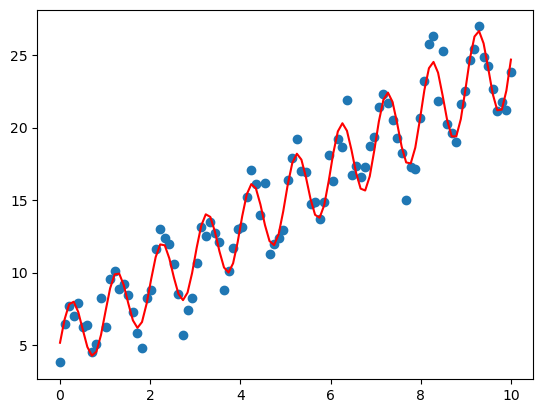

In [14]:
def st_with_sn_ss(x,m,p,q,r,s,c):
    return m*x + p*np.sin(2*np.pi*q*x) + r*np.sin(2*np.pi*s*x) + c

popt, covt = curve_fit(st_with_sn_ss, st_sn_ss[0], st_sn_ss[1])
predicts_sn_ss =  st_with_sn_ss(st_sn_ss[0], popt[0], popt[1], popt[2], popt[3],popt[4],popt[5])
plt.plot(st_sn_ss[0], predicts_sn_ss, color='r')
plt.scatter(st_sn_ss[0], st_sn_ss[1])
plt.show()

Mean:-0.04234938792735354, Std:1.5149071715597133


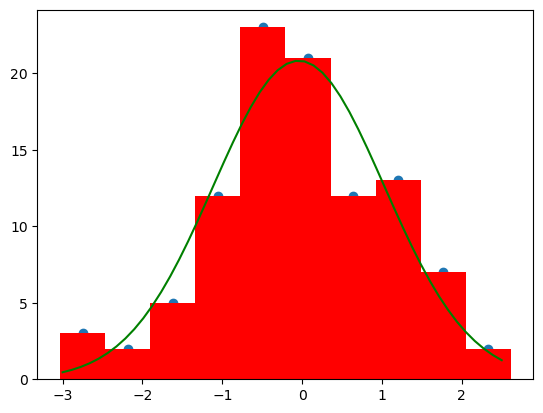

In [15]:
# Reisude
residue_sn_ss = predicts_sn_ss - st_sn_ss[1]
# print("Chi-sqaure:",chisquare(predicts_sn_ss,st_sn_ss[1]))
count, interval_points = np.histogram(residue_sn_ss, bins=10)
mid_points = (interval_points[:-1]+interval_points[1:])/2
plt.scatter(mid_points, count)
plt.hist(residue_sn_ss, color='r') # for matching the histograms obtained by np.histogram and plt.hist
popt, covt = curve_fit(gaussian,mid_points, count)
print(f"Mean:{popt[1]}, Std:{popt[2]}")
cont_values = np.linspace(-3,2.5,50)
predict_count = gaussian(cont_values, popt[0],popt[1], popt[2])
plt.plot(cont_values, predict_count, color='g');

In [16]:
mean_std(residue_sn_ss)

(3.8981400443116596e-07, 1.1055841071506989)

The End